In [319]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split #dividir datos en sets de entrenamiento y test
from sklearn.linear_model import LogisticRegression #modelo de regresión logística
from sklearn.metrics import classification_report #parámetros de precisión del modelo
from matplotlib import pyplot #gráficas
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix #matriz de confusión y parámetros de precisión del modelo

In [320]:
#Abrir el archivo csv
df = pd.read_csv('Todos.csv', sep=';', decimal=',')
df.head()
print(df.columns)

Index(['NHC', 'Edad', 'Sexo', 'Lado', 'Anticohagulantes',
       'ASA(Riesgo anestesico paciente)', 'Motivo Intervención',
       'Dia de Ingreso', 'Día Semana Ingreso', 'Dia de la semana iqx',
       'Tipo de protesis', 'Cirujano Principal', 'Dia Intervencion',
       'Dia Semana alta', 'Día de alta', 'Días ingresado', 'Hora de entrada',
       'Tiempo TOTAL QX', 'Tipo de anestesia', 'ATB(Antibiotico)', 'Momento',
       'HB_PRE', 'HTO-PRE', 'HB_POST', 'HTO-POST', 'TX(Transfusion)',
       'Complicaciones_Post', 'Complicaciones', 'Procedencia',
       'Patologias_previas', 'PAT_PREV'],
      dtype='object')


In [321]:
df.info()
#comprobación de qué variables son categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NHC                              33 non-null     int64  
 1   Edad                             33 non-null     int64  
 2   Sexo                             33 non-null     object 
 3   Lado                             33 non-null     object 
 4   Anticohagulantes                 33 non-null     object 
 5   ASA(Riesgo anestesico paciente)  33 non-null     object 
 6   Motivo Intervención              33 non-null     object 
 7   Dia de Ingreso                   33 non-null     object 
 8   Día Semana Ingreso               33 non-null     object 
 9   Dia de la semana iqx             33 non-null     object 
 10  Tipo de protesis                 33 non-null     object 
 11  Cirujano Principal               33 non-null     object 
 12  Dia Intervencion        

In [322]:
#convertir las variables categóricas en 'dummy variables' (variables con 2 o más niveles de categorías)
Riesgo= pd.get_dummies(df['ASA(Riesgo anestesico paciente)'],drop_first=True)
Transfusion=pd.get_dummies(df['TX(Transfusion)'],drop_first=True)
Anti=pd.get_dummies(df['Anticohagulantes'],drop_first=True)
Sexo= pd.get_dummies(df['Sexo'],drop_first=True)
Lado= pd.get_dummies(df['Lado'],drop_first=True)
Motivo= pd.get_dummies(df['Motivo Intervención'],drop_first=True)
Urbano=pd.get_dummies(df['Procedencia'],drop_first=True)
Pat_previas=pd.get_dummies(df['Patologias_previas'],drop_first=True)
Pat_prev=pd.get_dummies(df['PAT_PREV'],drop_first=True)
Complicaciones_post=pd.get_dummies(df['Complicaciones_Post'],drop_first=True)
Complicaciones=pd.get_dummies(df['Complicaciones'],drop_first=True)

In [323]:
#Reemplazar las anteriores columnas con dummies
df.drop(['Lado','Sexo','Anticohagulantes','Edad','Días ingresado','Tiempo TOTAL QX', 'HTO-PRE','HTO-POST','Motivo Intervención','Complicaciones','TX(Transfusion)', 'Día Semana Ingreso','Complicaciones_Post', 'Patologias_previas','ATB(Antibiotico)', 'Momento','Tipo de anestesia','Día de alta', 'Hora de entrada','Cirujano Principal', 'Dia Intervencion','Edad','Días ingresado','Dia Semana alta','ASA(Riesgo anestesico paciente)','Dia de Ingreso', 'Dia de la semana iqx','PAT_PREV', 'Tipo de protesis', 'NHC'], axis=1, inplace=True)
#Concatenar las nuevas columnas con las dummies al df
df = pd.concat([df], axis = 1)
print(df.columns)

Index(['HB_PRE', 'HB_POST', 'Procedencia'], dtype='object')


In [324]:
labels=pd.DataFrame(df['Procedencia'])
labels.Procedencia[labels.Procedencia =='Zaragoza']=1
labels.Procedencia[labels.Procedencia =='Rural']=0

df=df.drop(['Procedencia'], axis=1)
labels=labels.apply(pd.to_numeric)

In [325]:
x_train, x_test, y_train, y_test=train_test_split(df, labels,test_size=0.3, random_state=0)
# Crear el modelo de regresión logística
logmodel = LogisticRegression(class_weight='balanced').fit(x_train, y_train)
predictions_log=logmodel.predict(x_test)

/Users/danielsanzvaltuena/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [326]:
#Predecir la respuesta de y a lo largo de los valores de x
y_pred = logmodel.predict(x_test)
y_pred = y_pred
print(f"los valores de Hemoglobina de entrenamiento que se usan son:\n{x_test}")
print(f"predicción respuesta:\n{y_pred}")

los valores de Hemoglobina de entrenamiento que se usan son:
    HB_PRE  HB_POST
11    15.6     12.2
20    15.7     11.6
24    15.2     12.2
17    16.6     13.6
2     15.4     13.2
25    13.9     10.7
26    14.4     11.9
16    17.1     15.9
10    15.4     13.2
32    14.1     12.4
predicción respuesta:
[1 1 1 1 0 1 1 0 0 0]


In [327]:
#Parámetros de precisión y matriz de confusión
accuracy = accuracy_score(y_test, predictions_log)
precision = precision_score(y_test, predictions_log)
confusion = confusion_matrix(y_test, predictions_log)
print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Matriz de confusión:\n", confusion)


Accuracy: 0.5
Precisión: 0.6666666666666666
Matriz de confusión:
 [[1 2]
 [3 4]]


In [328]:
#Más valores de precisión
print (classification_report (y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.67      0.57      0.62         7

    accuracy                           0.50        10
   macro avg       0.46      0.45      0.45        10
weighted avg       0.54      0.50      0.52        10



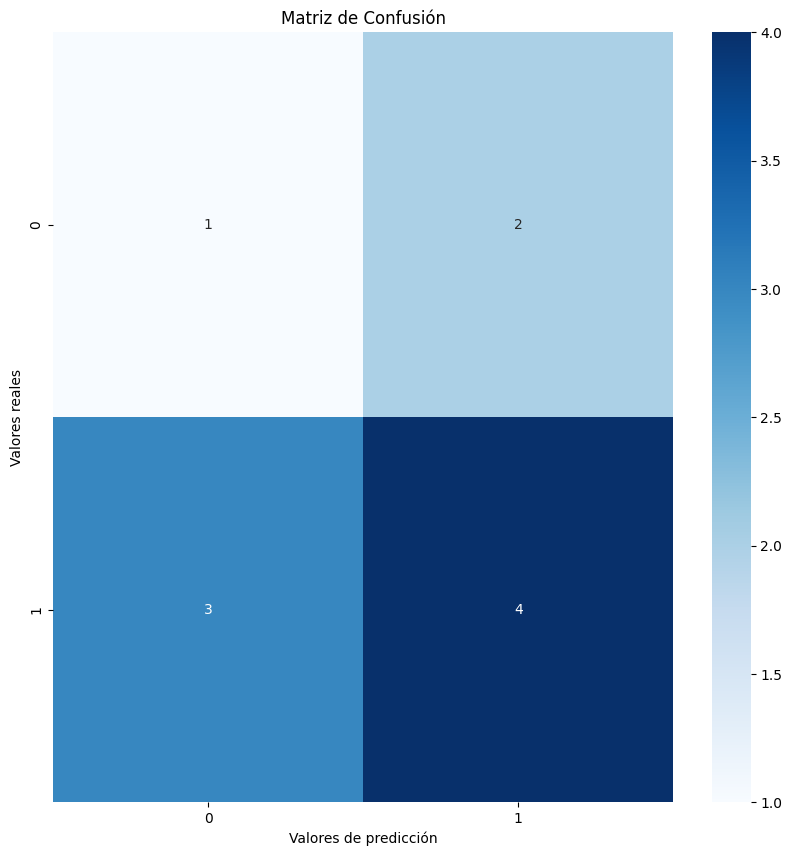

In [329]:
#Dibujar la matriz de confusión
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",)
pyplot.xlabel("Valores de predicción")
pyplot.ylabel("Valores reales")
pyplot.title("Matriz de Confusión")
pyplot.show()


In [330]:
importance = logmodel.coef_ .flatten()

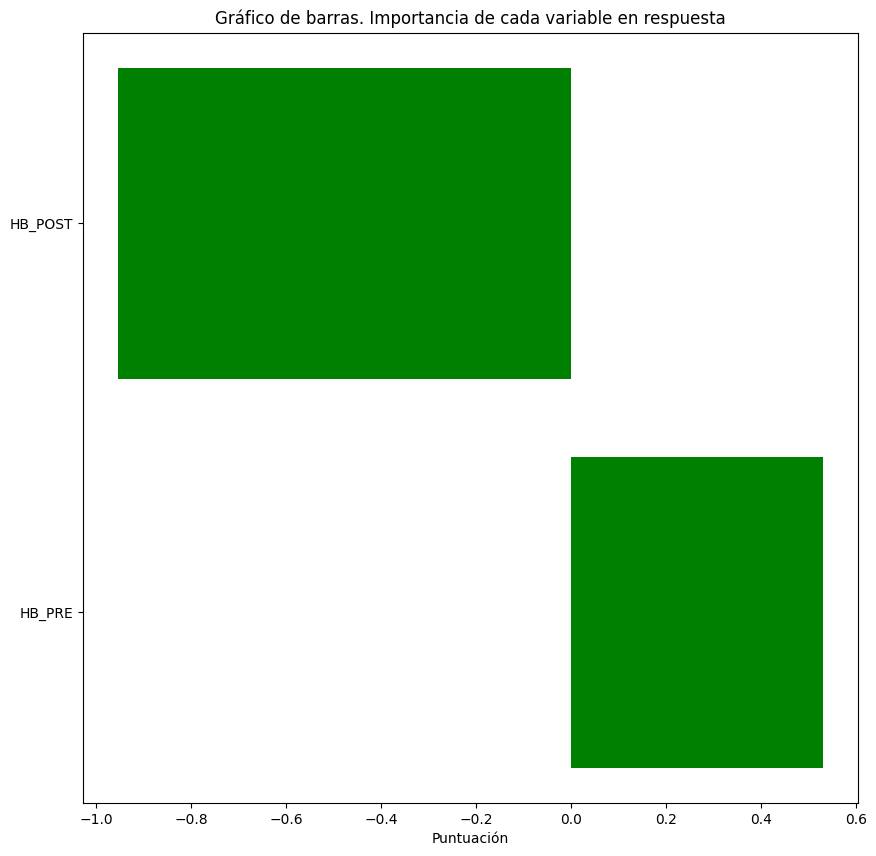

In [331]:
#Importancia de cada variable independiente en la variable respuesta
pyplot.rcParams ["figure.figsize" ] = (10, 10)
pyplot.barh(df.columns, importance, color = 'g')
pyplot.title ( "Gráfico de barras. Importancia de cada variable en respuesta")
pyplot.xlabel ("Puntuación" )
pyplot.show()